In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
feature = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:,feature]
y = df.loc[:,'target']
x = StandardScaler().fit_transform(x)         
print(x)        

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [55]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
pca = PCA(n_components=3)
pct = pca.fit_transform(x)
principal_df = pd.DataFrame(pct, columns=['pc1', 'pc2', 'pc3'])
finaldf = pd.concat([principal_df, df[['target']]], axis=1)
print(finaldf)

          pc1       pc2       pc3          target
0   -2.264542  0.505704 -0.121943     Iris-setosa
1   -2.086426 -0.655405 -0.227251     Iris-setosa
2   -2.367950 -0.318477  0.051480     Iris-setosa
3   -2.304197 -0.575368  0.098860     Iris-setosa
4   -2.388777  0.674767  0.021428     Iris-setosa
..        ...       ...       ...             ...
145  1.870522  0.382822  0.254532  Iris-virginica
146  1.558492 -0.905314 -0.025382  Iris-virginica
147  1.520845  0.266795  0.179277  Iris-virginica
148  1.376391  1.016362  0.931405  Iris-virginica
149  0.959299 -0.022284  0.528794  Iris-virginica

[150 rows x 4 columns]


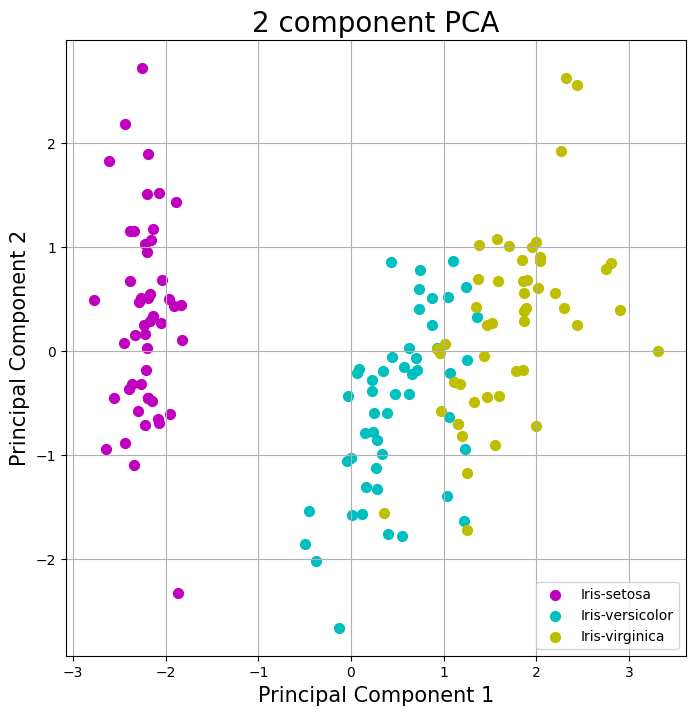

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['m', 'c', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

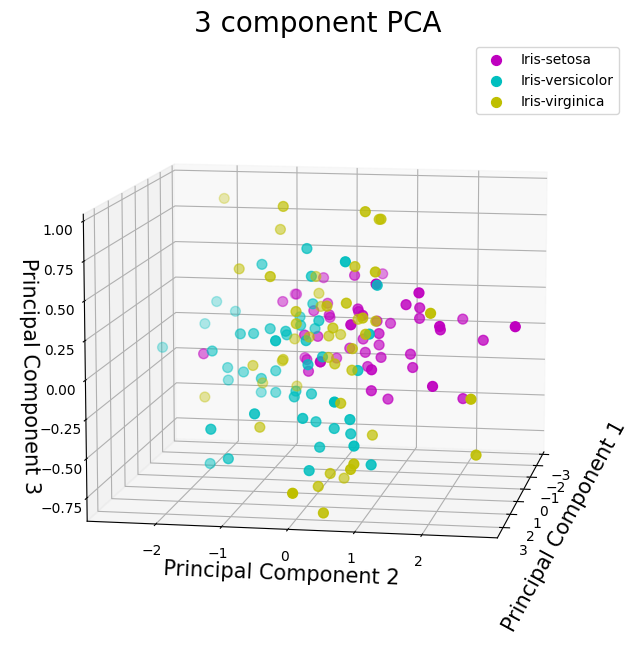

In [68]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15) 
ax.set_title('3 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['m', 'c', 'y']

for target, color in zip(targets, colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1'],
               finaldf.loc[indicesToKeep, 'pc2'],
               finaldf.loc[indicesToKeep, 'pc3'],  # Add PC3 for the z-axis
               c=color,
               s=50)

ax.legend(targets)
ax.grid()

ax.set_zlim([finaldf['pc3'].min(), finaldf['pc3'].max()])

ax.view_init(elev=10
             , azim=10) 


plt.show()
